## INSTALLATION

In [2]:
!pip install d2l==1.0.3
!pip install torch==2.0.0 torchvision==0.15.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 85.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 51.2 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 31.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 40.5 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully uninstalled requests-2.32.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.2
    Uninstalling pyparsing-3.1.2:
      Successfully uninstalled pyparsing-3.1.

In [3]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

In [4]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 * (x - mu)**2 / sigma**2)

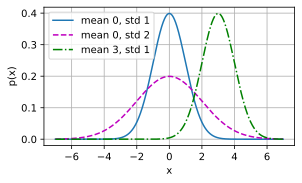

In [5]:
# Use NumPy again for visualization
x = np.arange(-7, 7, 0.01)

# Mean and standard deviation pairs
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

## LINEAR REGRESSION FROM SCRATCH

### Generating sample data

In [17]:
X = np.array([1, 2, 3, 4, 5])  # Feature array
y = np.array([2, 4, 6, 8, 10])  # Target array


In [20]:
assert len(X) == len(y), "Mismatch in number of samples between X and y"

### Defining the model

In [23]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weight = 0
        self.bias = 0
    
    def predict(self, X):
        return self.weight * X + self.bias
    
    def compute_gradient(self, X, Y_true, Y_predict):
        n = len(X)
        drw = -(2/n) * np.sum((Y_true - Y_predict) * X)
        drb = -(2/n) * np.sum(Y_true - Y_predict)
        return drw, drb
    
    def fit(self, X, y):
        for _ in range(self.epochs):
            y_predict = self.predict(X)
            drw, drb = self.compute_gradient(X, y, y_predict)
            self.weight -= self.lr * drw
            self.bias -= self.lr * drb
            
            if _ % 100 == 0:
                loss = np.mean((y - y_predict) ** 2)
                print(f"Epoch {_}, Loss: {loss}")


### Training the model


In [24]:
model = LinearRegression()
model.fit(x, y)

ValueError: operands could not be broadcast together with shapes (5,) (1400,) 